In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

def set_matplotlib_params():

    """Set matplotlib params."""

    mpl.rcParams.update(mpl.rcParamsDefault)
    mpl.rcParams.update(
        {
            "font.size": 24,
            "lines.linewidth": 2,
            "axes.labelsize": 24,  # fontsize for x and y labels
            "axes.titlesize": 24,
            "xtick.labelsize": 20,
            "ytick.labelsize": 20,
            "legend.fontsize": 20,
            "axes.linewidth": 2,
            "text.usetex": False,  # use LaTeX to write all text
            "axes.spines.right": False,
            "axes.spines.top": False,
            "axes.spines.left": True,
            "axes.spines.bottom": True,
            "axes.grid": False,
        }
    )

set_matplotlib_params()


<frozen importlib._bootstrap>:228: RuntimeWarning: scipy._lib.messagestream.MessageStream size changed, may indicate binary incompatibility. Expected 56 from C header, got 64 from PyObject


In [4]:
betas = np.zeros((2, 3, 100, 134))
for j in range(1,101):
    for k in range(2):
        data = pd.read_csv(f'output_backatit_SIMU_H{k}_{j}/SimuParameterTable.csv')
        data.index = data["Unnamed: 0"]
        data.drop('Unnamed: 0', axis=1, inplace=True)
        B = [f"beta[{i}]" for i in range(1, 135)]
        betas[k, 0, j-1, :] = data.loc[B]["mean"].values
        betas[k, 1, j-1, :] = data.loc[B]["sd"].values
        betas[k, 2, j-1, :] = - ((data.loc[B]["97.5%"].values > 0) * 1.) + 1

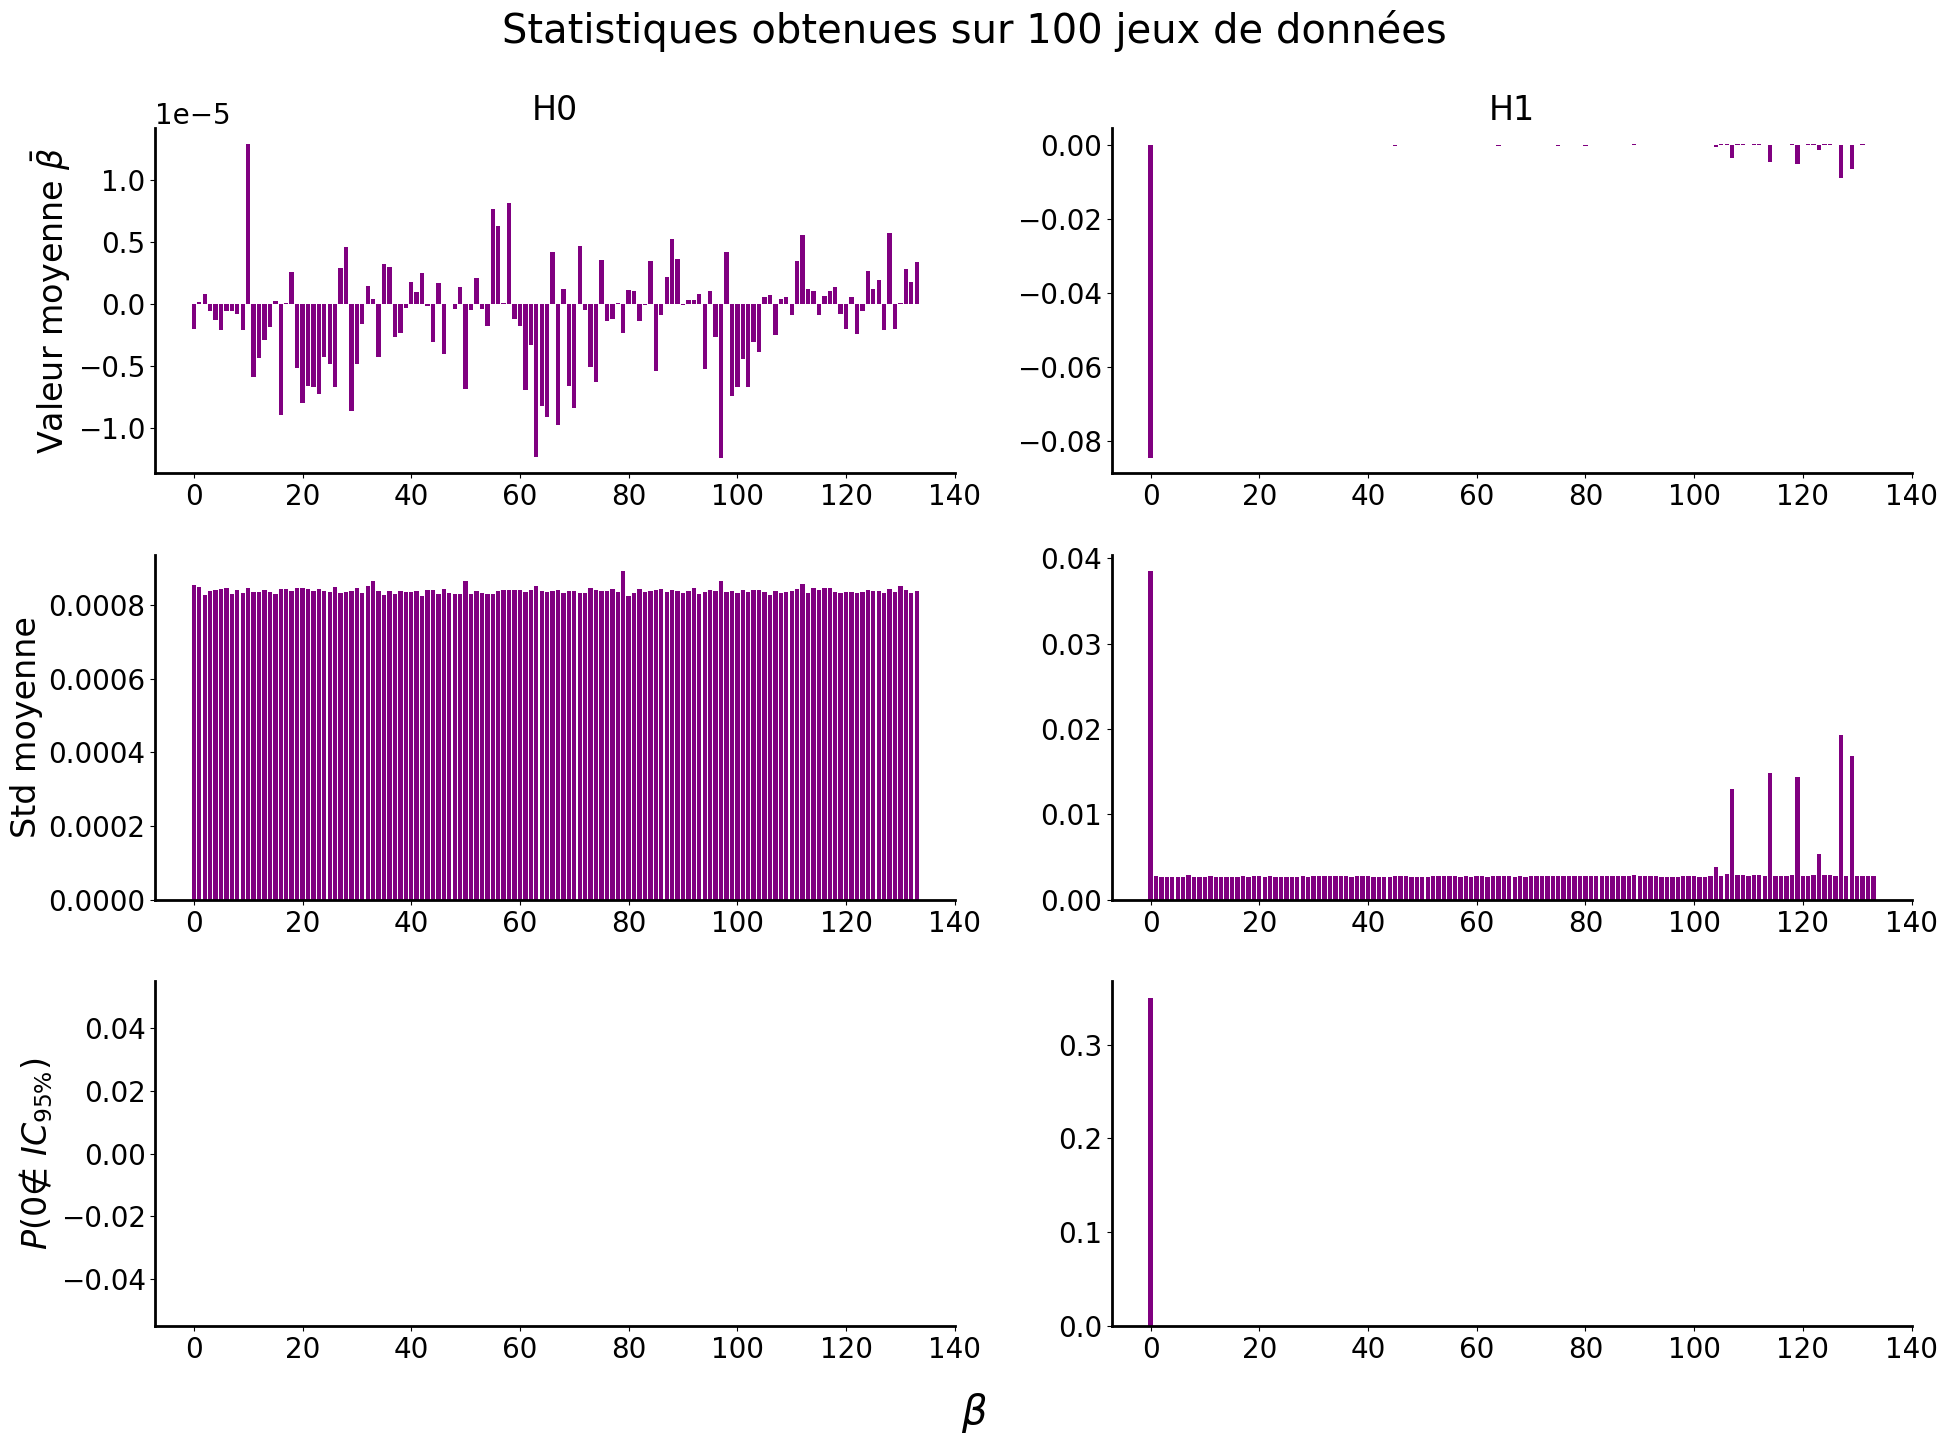

In [5]:
fig, axes = plt.subplots(3,2, figsize=(20, 15))
for j in range(3):
    for k in range(2):
        axes[j, k].bar(range(len(B)), betas[k, j].mean(axis=0), color='purple')
        axes[0, k].set_title(f"H{k}")
axes[0, 0].set_ylabel(r'Valeur moyenne $\bar{\beta}$')
axes[1, 0].set_ylabel(r'Std moyenne')
axes[2, 0].set_ylabel(r'$P(0 \notin~ IC_{95\%})$')
fig.suptitle('Statistiques obtenues sur 100 jeux de données')
fig.supxlabel(r'$\beta$',y=0.03)
fig.tight_layout()
fig.savefig('statistics_horseshoe.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [15]:
betas = np.zeros((2, 3, 16, 134))
for j in range(1,17):
    for k in range(2):
        data = pd.read_csv(f'output_laplace_SIMU_H{k}_{j}/SimuParameterTable.csv')
        data.index = data["Unnamed: 0"]
        data.drop('Unnamed: 0', axis=1, inplace=True)
        B = [f"beta[{i}]" for i in range(1, 135)]
        betas[k, 0, j-1, :] = data.loc[B]["mean"].values
        betas[k, 1, j-1, :] = data.loc[B]["sd"].values
        betas[k, 2, j-1, :] = - ((data.loc[B]["97.5%"].values > 0) * 1.) + 1

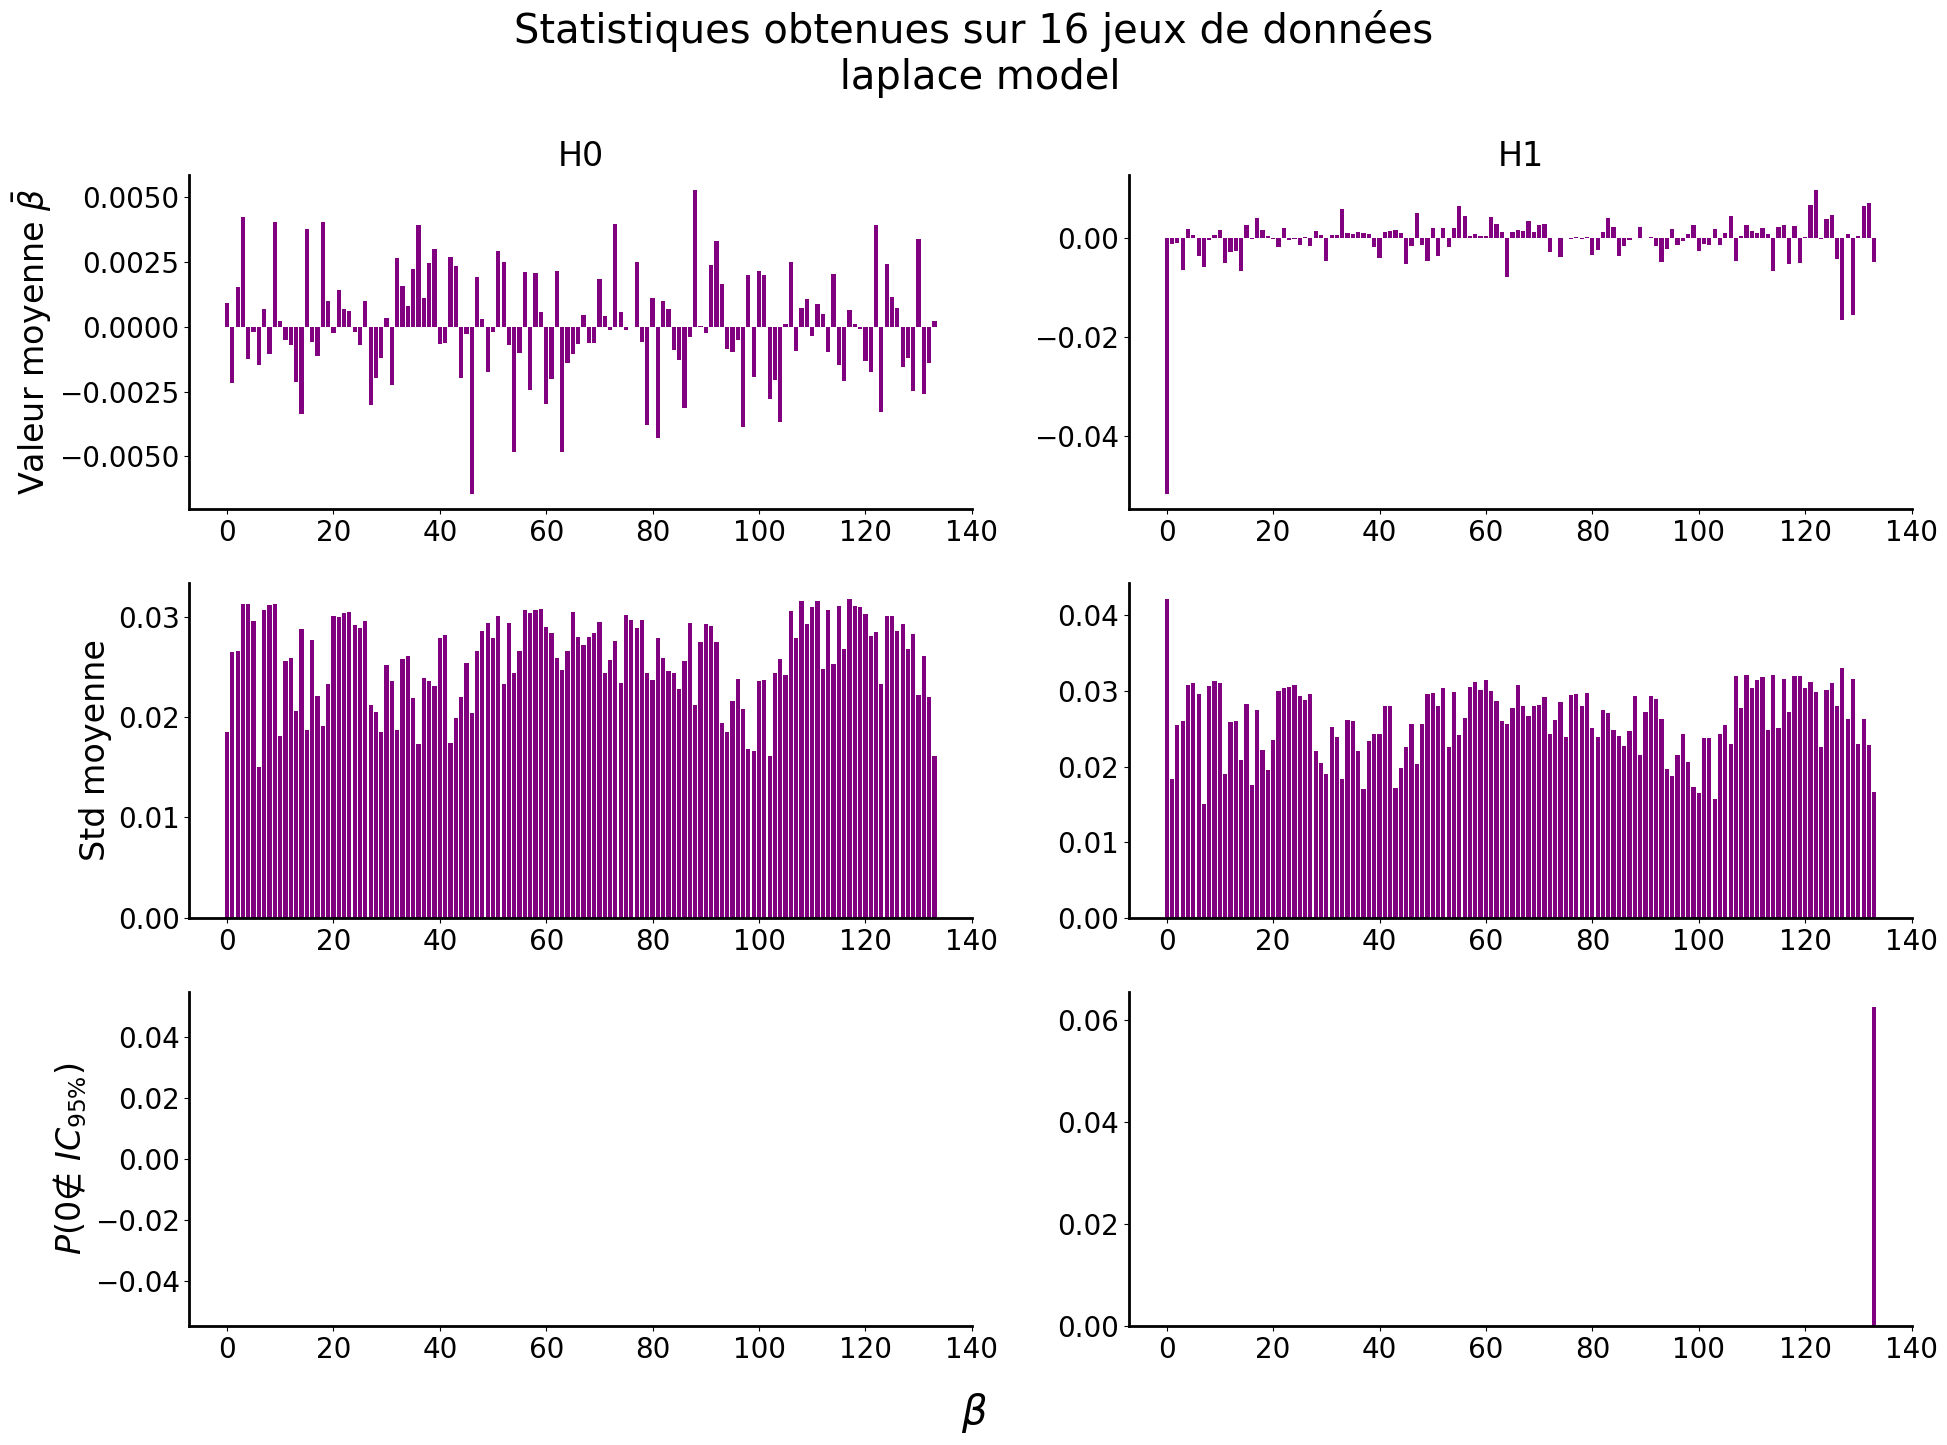

In [16]:
fig, axes = plt.subplots(3,2, figsize=(20, 15))
for j in range(3):
    for k in range(2):
        axes[j, k].bar(range(len(B)), betas[k, j].mean(axis=0), color='purple')
        axes[0, k].set_title(f"H{k}")
axes[0, 0].set_ylabel(r'Valeur moyenne $\bar{\beta}$')
axes[1, 0].set_ylabel(r'Std moyenne')
axes[2, 0].set_ylabel(r'$P(0 \notin~ IC_{95\%})$')
fig.suptitle(f'Statistiques obtenues sur {betas.shape[2]} jeux de données\n laplace model')
fig.supxlabel(r'$\beta$',y=0.03)
fig.tight_layout()
fig.savefig('statistics_laplace.pdf', bbox_inches='tight', transparent=True)
plt.show()

In [17]:
betas = np.zeros((2, 3, 18, 134))
for j in range(1,19):
    for k in range(2):
        data = pd.read_csv(f'output_globloclaplace_SIMU_H{k}_{j}/SimuParameterTable.csv')
        data.index = data["Unnamed: 0"]
        data.drop('Unnamed: 0', axis=1, inplace=True)
        B = [f"beta[{i}]" for i in range(1, 135)]
        betas[k, 0, j-1, :] = data.loc[B]["mean"].values
        betas[k, 1, j-1, :] = data.loc[B]["sd"].values
        betas[k, 2, j-1, :] = - ((data.loc[B]["97.5%"].values > 0) * 1.) + 1

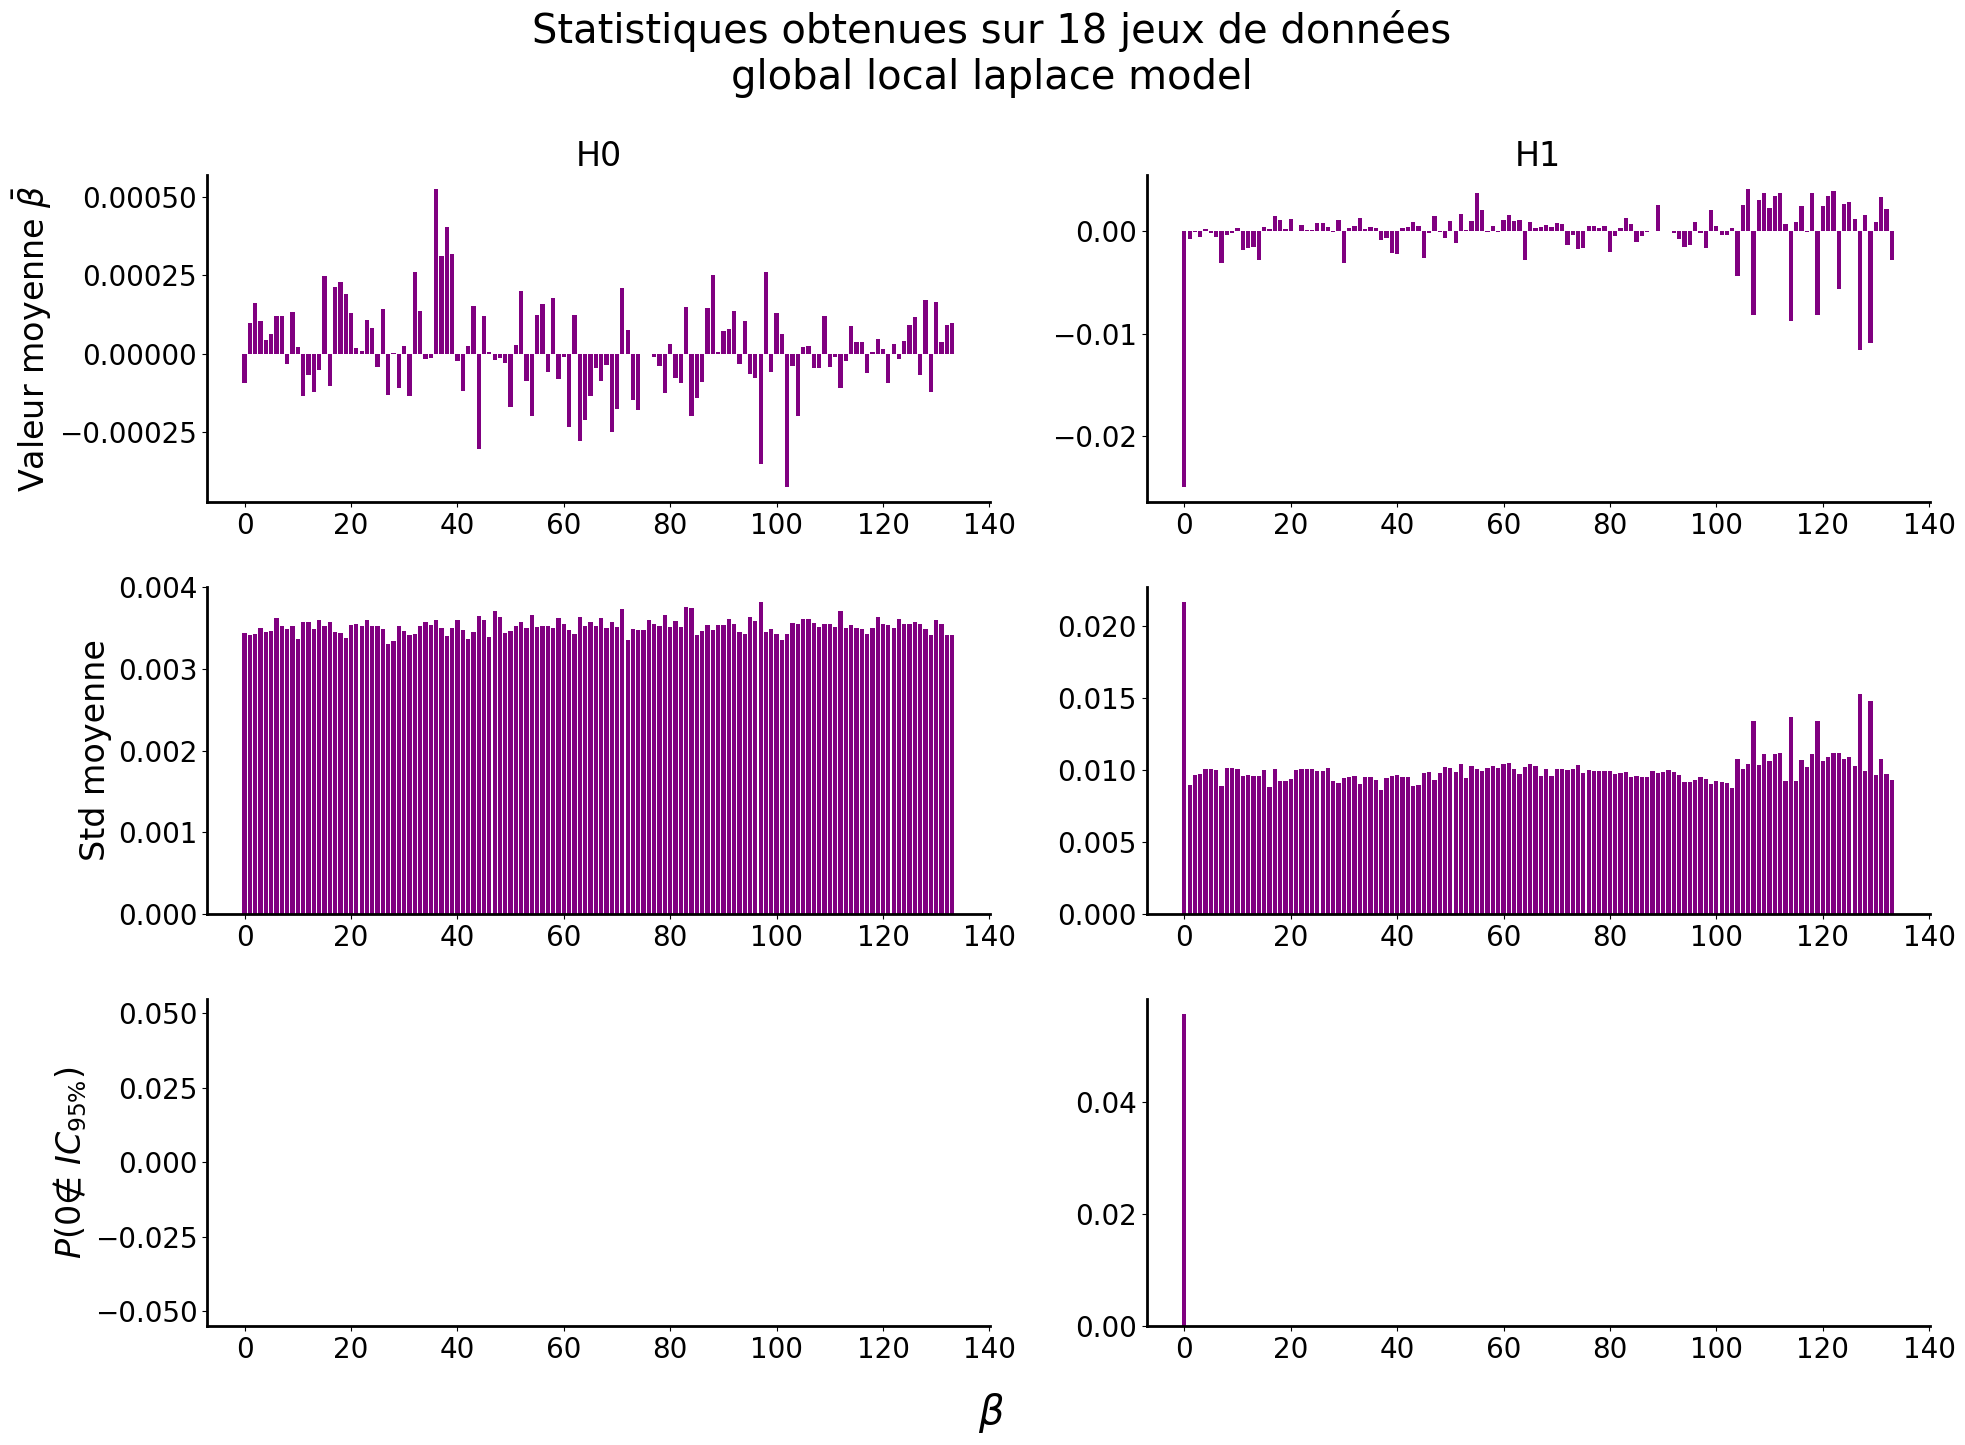

In [18]:
fig, axes = plt.subplots(3,2, figsize=(20, 15))
for j in range(3):
    for k in range(2):
        axes[j, k].bar(range(len(B)), betas[k, j].mean(axis=0), color='purple')
        axes[0, k].set_title(f"H{k}")
axes[0, 0].set_ylabel(r'Valeur moyenne $\bar{\beta}$')
axes[1, 0].set_ylabel(r'Std moyenne')
axes[2, 0].set_ylabel(r'$P(0 \notin~ IC_{95\%})$')
fig.suptitle(f'Statistiques obtenues sur {betas.shape[2]} jeux de données\nglobal local laplace model')
fig.supxlabel(r'$\beta$',y=0.03)
fig.tight_layout()
fig.savefig('statistics_globloclaplace.pdf', bbox_inches='tight', transparent=True)
plt.show()